# CS105 Final Project: To The Moon

## Team Members: Thomas Gustafson, Alex Kuang, Garrett Yamano

In this project, we utilize data from `Coinpaprika` for information regarding cryptocurrency starting from January 2018 to the end of July 2021. The cryptocurrencies we are interested in as follows: BTC, ETH, BNB, ADA, XRP. With the cryptocurrency data, we compare the digital coins to 4 global currencies including the Euro, Swiss Franc, Japanese Yen, and Chines Yuan.

In [1]:
#Beginning Final Project
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
response= requests.get("https://api.coinpaprika.com/v1/coins/btc-bitcoin/ohlcv/historical?start=2018-01-01&end=2018-01-01")
crypto=json.loads(response.text)
df_crypto=json_normalize(crypto)
df=pd.DataFrame()
df['Date']="01/01/2018"
df['BTC Close']=df_crypto['close']
df['BTC Market_Cap']=df_crypto['market_cap']
df

<ipython-input-1-a855d3bb2fe7>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto=json_normalize(crypto)


,Date,BTC Close,BTC Market_Cap
0,NaN,13657.2,236724393290


This is our initial starting point for the project. We agreed that we would need a DataFrame like the one above for each cryptocurrency. `Date` representing the day (obviously), but also key for comparing crypto and physical monetery value. `_crypto_ Close` represents the final recorded value for the particular day. `_crypto_ Market_Cap` represents the market value, calculated through `# of shares` * `share price`.

In [2]:
# BTC. ID: "btc-bitcoin"
df_btc = pd.DataFrame()
for a in range(2018, 2022):
    apilink = "https://api.coinpaprika.com/v1/coins/btc-bitcoin/ohlcv/historical?start=" + str(a) + "-01-01&end=2021-07-31"
    response1 = requests.get(apilink)
    crypto1=json.loads(response1.text)
    df_crypto1=json_normalize(crypto1)
    df_temp = pd.DataFrame()
    df_temp['Date'] = df_crypto1['time_open'].str[:10]
    df_temp['BTC Close'] = df_crypto1['close']
    df_temp['BTC Market_Cap'] = df_crypto1['market_cap']
    df_temp['BTC Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100

    df_btc = df_btc.append(df_temp)
df_btc

<ipython-input-2-a0345abeeb07>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


,Date,BTC Close,BTC Market_Cap,BTC Change
0,2018-01-01,13657.200000,236724393290,-3.224161
1,2018-01-02,14982.100000,228578954125,9.960367
2,2018-01-03,15201.000000,251312477610,1.487495
3,2018-01-04,15599.200000,256250164598,2.151178
4,2018-01-05,17429.500000,259747842446,12.614039
...,...,...,...,...
207,2021-07-27,39179.960075,700515574350,4.967519
208,2021-07-28,40020.172623,739597843609,1.558583
209,2021-07-29,40017.903159,751306446958,-0.024577
210,2021-07-30,41954.149501,751302916684,4.818727


Just to get an understanding of the data we're working with we print the DataFrame and analyze what's important and what's unncecessary. Firstly, it's interesting to note that even though we queried for an almost 4 year period (1307 days) we only received 365 rows. Obviously we're only receiving one year's worth of data so that's a challenge. Secondly, both `time_open` and `time_close` have extra characters attached to `Date` information we want.

And finally, below we check to see if there are any `NaN`s we need to account for in the Dataset. From the output, it's apparent that all columns are comprised of non-NaN values.

In [3]:
df_crypto.isna().any()

time_open     False
time_close    False
open          False
high          False
low           False
close         False
volume        False
market_cap    False
dtype: bool

Since we can only get a year's worth of data at a time, we need to make multiple API calls for each year and, after collecting each year, concatenate the DataFrames into one DataFrame. In order to get the `Date` in the form we desire, we take only the first 10 characters from the `time_open` column. 

Another new change in the calculation of `_crypto_ Change` which is a calculation to see the growth of a cryptocurrency throughout the day. This adds another feature to each cryptocurrency that may play a role in plotting a relationship between digital and physical currencies.

In [4]:
# ETH. ID: "eth-ethereum"
df_eth = pd.DataFrame()
for a in range(2018, 2022):
    apilink = "https://api.coinpaprika.com/v1/coins/eth-ethereum/ohlcv/historical?start=" + str(a) + "-01-01&end=2021-07-31"
    response1 = requests.get(apilink)
    crypto1=json.loads(response1.text)
    df_crypto1=json_normalize(crypto1)
    df_temp = pd.DataFrame()
    df_temp['Date'] = df_crypto1['time_open'].str[:10]
    df_temp['ETH Close'] = df_crypto1['close']
    df_temp['ETH Market_Cap'] = df_crypto1['market_cap']
    df_temp['ETH Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
    df_eth = df_eth.append(df_temp)
df=df_btc.set_index('Date').join(df_eth.set_index('Date'))
df_eth


<ipython-input-4-85cfb4c972cd>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


,Date,ETH Close,ETH Market_Cap,ETH Change
0,2018-01-01,772.641000,73075799389,2.234051
1,2018-01-02,884.444000,74695703197,14.513961
2,2018-01-03,962.720000,85703497216,8.659142
3,2018-01-04,980.922000,93049398528,1.997373
4,2018-01-05,997.720000,94423811775,2.251601
...,...,...,...,...
207,2021-07-27,2291.889619,260949845564,2.632247
208,2021-07-28,2297.601347,268717154068,-0.074782
209,2021-07-29,2380.876719,268643766764,3.586972
210,2021-07-30,2460.254221,278517413053,3.257486


An interesting observation from the previous output is that the last row has an index of 211 when there are 1307 rows total. Every time a DataFrame is appended, the index resets back to zero because each loop we initialize a new DataFrame that starts at 0. 

While the index would be a problem to resolve, it doesn't matter to us because we were going to use `set_index('Date')` anyways in order to overwrite the index. This change can be seen in the output below. 

The last change from the previous code is `df=df_btc.set_index('Date').join(df_eth.set_index('Date'))`, which not only sets the index to `Date`, but joins both the previous crypto DataFrame with the current DataFrame to create an all-encompassing DataFrame that holds all of our crypto data.

In [5]:
# BNB. ID: "bnb-binance-coin"
df_bnb = pd.DataFrame()
for a in range(2018, 2022):
    apilink = "https://api.coinpaprika.com/v1/coins/bnb-binance-coin/ohlcv/historical?start=" + str(a) + "-01-01&end=2021-07-31"
    response1 = requests.get(apilink)
    crypto1=json.loads(response1.text)
    df_crypto1=json_normalize(crypto1)
    df_temp = pd.DataFrame()
    df_temp['Date'] = df_crypto1['time_open'].str[:10]
    df_temp['BNB Close'] = df_crypto1['close']
    df_temp['BNB Market_Cap'] = df_crypto1['market_cap']
    df_temp['BNB Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
    df_bnb = df_bnb.append(df_temp)
df=df.join(df_bnb.set_index('Date'))
df_bnb


<ipython-input-5-6db04bff4064>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


,Date,BNB Close,BNB Market_Cap,BNB Change
0,2018-01-01,8.414610,854444283,-2.490518
1,2018-01-02,8.837770,837430707,4.493775
2,2018-01-03,9.535880,868366641,8.731218
3,2018-01-04,9.213990,935270401,-2.454520
4,2018-01-05,14.917200,905550359,63.106516
...,...,...,...,...
207,2021-07-27,313.302225,46704503716,2.925551
208,2021-07-28,313.604441,48086728557,0.063446
209,2021-07-29,317.569780,48143821771,1.208524
210,2021-07-30,321.676431,48656842270,1.436395


In [6]:
# ADA. ID: "ada-cardano"
df_ada = pd.DataFrame()
for a in range(2018, 2022):
    apilink = "https://api.coinpaprika.com/v1/coins/ada-cardano/ohlcv/historical?start=" + str(a) + "-01-01&end=2021-07-31"
    response1 = requests.get(apilink)
    crypto1=json.loads(response1.text)
    df_crypto1=json_normalize(crypto1)
    df_temp = pd.DataFrame()
    df_temp['Date'] = df_crypto1['time_open'].str[:10]
    df_temp['ADA Close'] = df_crypto1['close']
    df_temp['ADA Market_Cap'] = df_crypto1['market_cap']
    df_temp['ADA Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
    df_ada = df_ada.append(df_temp)
df=df.join(df_ada.set_index('Date'))
df_ada


<ipython-input-6-3235ea1e4272>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


,Date,ADA Close,ADA Market_Cap,ADA Change
0,2018-01-01,0.728657,18637596875,1.364685
1,2018-01-02,0.782587,18788725769,7.991295
2,2018-01-03,1.079660,20214844284,38.474581
3,2018-01-04,1.114120,28364992980,1.836330
4,2018-01-05,0.999559,30364488660,-14.651496
...,...,...,...,...
207,2021-07-27,1.275489,40191370547,1.382894
208,2021-07-28,1.283782,40857090669,0.379412
209,2021-07-29,1.284281,41042435881,-0.034984
210,2021-07-30,1.300914,41033115715,1.282626


In [7]:
# XRP. ID: "xrp-xrp"
df_xrp = pd.DataFrame()
for a in range(2018, 2022):
    apilink = "https://api.coinpaprika.com/v1/coins/xrp-xrp/ohlcv/historical?start=" + str(a) + "-01-01&end=2021-07-31"
    response1 = requests.get(apilink)
    crypto1=json.loads(response1.text)
    df_crypto1=json_normalize(crypto1)
    df_temp = pd.DataFrame()
    df_temp['Date'] = df_crypto1['time_open'].str[:10]
    df_temp['XRP Close'] = df_crypto1['close']
    df_temp['XRP Market_Cap'] = df_crypto1['market_cap']
    df_temp['XRP Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
    df_xrp = df_xrp.append(df_temp)
df=df.join(df_xrp.set_index('Date'))
df_xrp


<ipython-input-7-4dd0e9bd2bc0>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


,Date,XRP Close,XRP Market_Cap,XRP Change
0,2018-01-01,2.391030,88945851351,4.138030
1,2018-01-02,2.480900,91791628932,4.702298
2,2018-01-03,3.105370,95457126817,26.024512
3,2018-01-04,3.196630,120763085797,2.543515
4,2018-01-05,3.048710,127870556702,-7.637519
...,...,...,...,...
207,2021-07-27,0.642023,28900507820,2.778096
208,2021-07-28,0.728777,29840610072,13.105695
209,2021-07-29,0.748560,33933696640,2.162868
210,2021-07-30,0.750517,34581342632,0.511605


Now we have data on all of the cryptocurrencies of interest in a DataFrame `df`, so we display it to make sure everything is formatted to our liking. Looks good.

In [8]:
df

,BTC Close,BTC Market_Cap,BTC Change,ETH Close,ETH Market_Cap,ETH Change,BNB Close,BNB Market_Cap,BNB Change,ADA Close,ADA Market_Cap,ADA Change,XRP Close,XRP Market_Cap,XRP Change
Date,,,,,,,,,,,,,,,
2018-01-01,13657.200000,236724393290,-3.224161,772.641000,73075799389,2.234051,8.414610,854444283,-2.490518,0.728657,18637596875,1.364685,2.391030,88945851351,4.138030
2018-01-02,14982.100000,228578954125,9.960367,884.444000,74695703197,14.513961,8.837770,837430707,4.493775,0.782587,18788725769,7.991295,2.480900,91791628932,4.702298
2018-01-03,15201.000000,251312477610,1.487495,962.720000,85703497216,8.659142,9.535880,868366641,8.731218,1.079660,20214844284,38.474581,3.105370,95457126817,26.024512
2018-01-04,15599.200000,256250164598,2.151178,980.922000,93049398528,1.997373,9.213990,935270401,-2.454520,1.114120,28364992980,1.836330,3.196630,120763085797,2.543515
2018-01-05,17429.500000,259747842446,12.614039,997.720000,94423811775,2.251601,14.917200,905550359,63.106516,0.999559,30364488660,-14.651496,3.048710,127870556702,-7.637519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,39179.960075,700515574350,4.967519,2291.889619,260949845564,2.632247,313.302225,46704503716,2.925551,1.275489,40191370547,1.382894,0.642023,28900507820,2.778096
2021-07-28,40020.172623,739597843609,1.558583,2297.601347,268717154068,-0.074782,313.604441,48086728557,0.063446,1.283782,40857090669,0.379412,0.728777,29840610072,13.105695
2021-07-29,40017.903159,751306446958,-0.024577,2380.876719,268643766764,3.586972,317.569780,48143821771,1.208524,1.284281,41042435881,-0.034984,0.748560,33933696640,2.162868


# Data Gathering (Global Currency)

Just like the crypto example, we start by reading from the API.

In [9]:
response = requests.get("https://api.frankfurter.app/2018-01-01..2021-12-31?from=USD")
global_temp=json.loads(response.text)
df_global_temp=json_normalize(global_temp)
df_global_temp

<ipython-input-9-b9c646a5acbf>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_global_temp=json_normalize(global_temp)


,amount,base,start_date,end_date,rates.2018-01-01.AUD,rates.2018-01-01.BGN,rates.2018-01-01.BRL,rates.2018-01-01.CAD,rates.2018-01-01.CHF,rates.2018-01-01.CNY,...,rates.2021-08-23.NZD,rates.2021-08-23.PHP,rates.2021-08-23.PLN,rates.2021-08-23.RON,rates.2021-08-23.RUB,rates.2021-08-23.SEK,rates.2021-08-23.SGD,rates.2021-08-23.THB,rates.2021-08-23.TRY,rates.2021-08-23.ZAR
0,1.0,USD,2018-01-01,2021-08-23,1.2762,1.6231,3.2543,1.2522,0.97461,6.4945,...,1.4418,50.008,3.9006,4.1982,73.97,8.7137,1.3547,32.881,8.4133,15.0152


Unlike the cryptocurrency data previously, all of the data is stored in the first index which makes gathering data more troublesome. From first glance, this data looks good-to-go, but once we examine the DataFrame deeper we understand how this data is surprisingly difficult to work with. 

For example, in the code below we test how the API handles a time period of almost 4 years. 

In [10]:
df_global_temp.iloc[:,33:40]

,rates.2018-01-01.TRY,rates.2018-01-01.ZAR,rates.2018-01-08.AUD,rates.2018-01-08.BGN,rates.2018-01-08.BRL,rates.2018-01-08.CAD,rates.2018-01-08.CHF
0,3.758,12.3487,1.2743,1.6285,3.2334,1.2477,0.97727


From what we can tell, the data actually skips every day other than Monday. Seeing this complication, we applied the same tactic as the cryptocurrency section and split each API call by year.

In [11]:
response2018= requests.get("https://api.frankfurter.app/2018-01-01..2018-12-31?from=USD")
response2019= requests.get("https://api.frankfurter.app/2019-01-01..2019-12-31?from=USD")
response2020= requests.get("https://api.frankfurter.app/2020-01-01..2020-12-31?from=USD")
response2021= requests.get("https://api.frankfurter.app/2021-01-01..2021-12-31?from=USD")

df_temp2018=json.loads(response2018.text)
df_df_temp2018=json_normalize(df_temp2018)

df_temp2019=json.loads(response2019.text)
df_df_temp2019=json_normalize(df_temp2019)

df_temp2020=json.loads(response2020.text)
df_df_temp2020=json_normalize(df_temp2020)

df_temp2021=json.loads(response2021.text)
df_df_temp2021=json_normalize(df_temp2021)

<ipython-input-11-e858153ef7bd>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_df_temp2018=json_normalize(df_temp2018)
<ipython-input-11-e858153ef7bd>:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_df_temp2019=json_normalize(df_temp2019)
<ipython-input-11-e858153ef7bd>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_df_temp2020=json_normalize(df_temp2020)
<ipython-input-11-e858153ef7bd>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_df_temp2021=json_normalize(df_temp2021)


In [12]:
df_df_temp2018

,amount,base,start_date,end_date,rates.2018-01-02.AUD,rates.2018-01-02.BGN,rates.2018-01-02.BRL,rates.2018-01-02.CAD,rates.2018-01-02.CHF,rates.2018-01-02.CNY,...,rates.2018-12-31.NZD,rates.2018-12-31.PHP,rates.2018-12-31.PLN,rates.2018-12-31.RON,rates.2018-12-31.RUB,rates.2018-12-31.SEK,rates.2018-12-31.SGD,rates.2018-12-31.THB,rates.2018-12-31.TRY,rates.2018-12-31.ZAR
0,1.0,USD,2018-01-02,2018-12-31,1.2775,1.6211,3.2743,1.2539,0.97124,6.493,...,1.4896,52.5,3.7567,4.0729,69.62,8.9562,1.3617,32.36,5.2915,14.375


After splitting the data by year, we expected to be out of the woods regarding problems with this dataset, but discovered a new problem which can be seen below.

In [13]:
df_df_temp2018.iloc[:,125:130]

,rates.2018-01-05.THB,rates.2018-01-05.TRY,rates.2018-01-05.ZAR,rates.2018-01-08.AUD,rates.2018-01-08.BGN
0,32.19,3.7465,12.3608,1.277,1.6335


The issue above is that the JSON file doesn't show weekend data. So we're working with a Dataset that is all placed in a single row and it lacks weekend data.

In order to resolve these issues, the code below is repeated for each physical currency. The process goes as follows:

1. Use an outer for loop to loop throughout the months.
2. Before the inner loop, check to see how many days are within said month and set the upper bound to that number.
3. Check to see if the `Date` is a weekend. If so, set all values in the DataFrame to `NaN`. If not, just store the data in a DataFrame.
4. Append the DataFrame after each inner loop.
5. Once both loops are completed, run a line of code that allows weekend `NaN` values to pull data from next row (specifically Mondays).
6. Once there are no more `NaN`s, append the physical currency to a final physical currency DataFrame that will hold all the physical currencies we wish to compare.

In [14]:
import numpy as np
from calendar import monthrange

years = ["18", "19", "20", "21"]
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
days = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]
currencies = ["EUR", "CHF", "JPY", "CNY"]
global_curr=pd.DataFrame()
final_global_curr_2018 = pd.DataFrame()
final_curr = pd.DataFrame()

for j in range(0, 12):
    dayspermonth = monthrange(int("20" + str(years[0])), int(j+1))[1]
    for k in range(0, int(dayspermonth)):
        new_rates = "rates.20" + str(years[0]) + "-" + str(months[j]) + "-" + str(days[k]) + "."
        global_curr['Date'] = ["20" + str(years[0]) + "-" + str(months[j]) + "-" + str(days[k])]
        if (str(new_rates + str(currencies[0]))) in df_df_temp2018:
            global_curr['Euro Value']=df_df_temp2018[str(new_rates) + str(currencies[0])]
            global_curr['Swiss Franc Value']=df_df_temp2018[str(new_rates) + str(currencies[1])]
            global_curr['Japanese Yen Value']=df_df_temp2018[str(new_rates) + str(currencies[2])]
            global_curr['Chinese Yuan Value']=df_df_temp2018[str(new_rates) + str(currencies[3])]
        else:
            global_curr['Euro Value']=np.nan
            global_curr['Swiss Franc Value']=np.nan
            global_curr['Japanese Yen Value']=np.nan
            global_curr['Chinese Yuan Value']=np.nan
        final_global_curr_2018 = final_global_curr_2018.append(global_curr)

# Replace NaN's with value from the previous row
# final_global_curr_2018.fillna(method='pad', inplace=True)

# Replace NaN's with value from the next row
final_global_curr_2018.fillna(method='bfill', inplace=True)

# Add this DataFrame to the final Dataframe that captures 2018-2021
final_curr = final_curr.append(final_global_curr_2018)

final_global_curr_2018.head(10)

,Date,Euro Value,Swiss Franc Value,Japanese Yen Value,Chinese Yuan Value
0,2018-01-01,0.82884,0.97124,112.18,6.4930
0,2018-01-02,0.82884,0.97124,112.18,6.4930
0,2018-01-03,0.83174,0.97613,112.26,6.5015
0,2018-01-04,0.82884,0.97497,112.66,6.4965
0,2018-01-05,0.83022,0.97609,113.28,6.4883
0,2018-01-06,0.83521,0.97795,113.04,6.4993
0,2018-01-07,0.83521,0.97795,113.04,6.4993
0,2018-01-08,0.83521,0.97795,113.04,6.4993
0,2018-01-09,0.83808,0.98282,112.56,6.5257
0,2018-01-10,0.83389,0.97774,111.42,6.5040


In [15]:
global_curr=pd.DataFrame()
final_global_curr_2019 = pd.DataFrame()

for j in range(0, 12):
    for k in range(0, 31):
        new_rates = "rates.20" + str(years[1]) + "-" + str(months[j]) + "-" + str(days[k]) + "."
        global_curr['Date'] = ["20" + str(years[1]) + "-" + str(months[j]) + "-" + str(days[k])]
        if (str(new_rates + str(currencies[0]))) in df_df_temp2019:
            global_curr['Euro Value']=df_df_temp2019[str(new_rates) + str(currencies[0])]
            global_curr['Swiss Franc Value']=df_df_temp2019[str(new_rates) + str(currencies[1])]
            global_curr['Japanese Yen Value']=df_df_temp2019[str(new_rates) + str(currencies[2])]
            global_curr['Chinese Yuan Value']=df_df_temp2019[str(new_rates) + str(currencies[3])]
        else:
            global_curr['Euro Value']=np.nan
            global_curr['Swiss Franc Value']=np.nan
            global_curr['Japanese Yen Value']=np.nan
            global_curr['Chinese Yuan Value']=np.nan
        final_global_curr_2019 = final_global_curr_2019.append(global_curr)

# Replace NaN's with value from the previous row
# final_global_curr_2019.fillna(method='pad', inplace=True)

# Replace NaN's with value from the next row
final_global_curr_2019.fillna(method='bfill', inplace=True)

# Add this DataFrame to the final Dataframe that captures 2018-2021
final_curr = final_curr.append(final_global_curr_2019)

final_global_curr_2019

,Date,Euro Value,Swiss Franc Value,Japanese Yen Value,Chinese Yuan Value
0,2019-01-01,0.87742,0.98614,109.05,6.8584
0,2019-01-02,0.87742,0.98614,109.05,6.8584
0,2019-01-03,0.88121,0.98863,107.69,6.8751
0,2019-01-04,0.87696,0.98711,108.04,6.8649
0,2019-01-05,0.87374,0.98095,108.26,6.8520
...,...,...,...,...,...
0,2019-12-27,0.89662,0.97642,109.59,6.9959
0,2019-12-28,0.89373,0.97158,109.21,6.9868
0,2019-12-29,0.89373,0.97158,109.21,6.9868
0,2019-12-30,0.89373,0.97158,109.21,6.9868


In [16]:
global_curr=pd.DataFrame()
final_global_curr_2020 = pd.DataFrame()

for j in range(0, 12):
    dayspermonth = monthrange(int("20" + str(years[2])), int(j+1))[1]
    for k in range(0, int(dayspermonth)):
        new_rates = "rates.20" + str(years[2]) + "-" + str(months[j]) + "-" + str(days[k]) + "."
        global_curr['Date'] = ["20" + str(years[2]) + "-" + str(months[j]) + "-" + str(days[k])]
        if (str(new_rates + str(currencies[0]))) in df_df_temp2020:
            global_curr['Euro Value']=df_df_temp2020[str(new_rates) + str(currencies[0])]
            global_curr['Swiss Franc Value']=df_df_temp2020[str(new_rates) + str(currencies[1])]
            global_curr['Japanese Yen Value']=df_df_temp2020[str(new_rates) + str(currencies[2])]
            global_curr['Chinese Yuan Value']=df_df_temp2020[str(new_rates) + str(currencies[3])]
        else:
            global_curr['Euro Value']=np.nan
            global_curr['Swiss Franc Value']=np.nan
            global_curr['Japanese Yen Value']=np.nan
            global_curr['Chinese Yuan Value']=np.nan
        final_global_curr_2020 = final_global_curr_2020.append(global_curr)

# Replace NaN's with value from the previous row
# final_global_curr_2020.fillna(method='pad', inplace=True)

# Replace NaN's with value from the next row
final_global_curr_2020.fillna(method='bfill', inplace=True)

# Add this DataFrame to the final Dataframe that captures 2018-2021
final_curr = final_curr.append(final_global_curr_2020)

final_global_curr_2020

,Date,Euro Value,Swiss Franc Value,Japanese Yen Value,Chinese Yuan Value
0,2020-01-01,0.89342,0.97070,108.77,6.9638
0,2020-01-02,0.89342,0.97070,108.77,6.9638
0,2020-01-03,0.89710,0.97246,108.14,6.9716
0,2020-01-04,0.89334,0.96927,108.11,6.9724
0,2020-01-05,0.89334,0.96927,108.11,6.9724
...,...,...,...,...,...
0,2020-12-27,0.81840,0.88829,103.56,6.5395
0,2020-12-28,0.81840,0.88829,103.56,6.5395
0,2020-12-29,0.81573,0.88604,103.78,6.5315
0,2020-12-30,0.81427,0.88405,103.06,6.5250


In [17]:
global_curr=pd.DataFrame()
final_global_curr_2021 = pd.DataFrame()

for j in range(0, 7):
    dayspermonth = monthrange(int("20" + str(years[3])), int(j+1))[1]
    for k in range(0, int(dayspermonth)):
        new_rates = "rates.20" + str(years[3]) + "-" + str(months[j]) + "-" + str(days[k]) + "."
        global_curr['Date'] = ["20" + str(years[3]) + "-" + str(months[j]) + "-" + str(days[k])]
        if (str(new_rates + str(currencies[0]))) in df_df_temp2021:
            global_curr['Euro Value']=df_df_temp2021[str(new_rates) + str(currencies[0])]
            global_curr['Swiss Franc Value']=df_df_temp2021[str(new_rates) + str(currencies[1])]
            global_curr['Japanese Yen Value']=df_df_temp2021[str(new_rates) + str(currencies[2])]
            global_curr['Chinese Yuan Value']=df_df_temp2021[str(new_rates) + str(currencies[3])]
        else:
            global_curr['Euro Value']=np.nan
            global_curr['Swiss Franc Value']=np.nan
            global_curr['Japanese Yen Value']=np.nan
            global_curr['Chinese Yuan Value']=np.nan
        final_global_curr_2021 = final_global_curr_2021.append(global_curr)

# Replace NaN's with value from the previous row
# final_global_curr_2021.fillna(method='pad', inplace=True)

# Replace NaN's with value from the next row
final_global_curr_2021.fillna(method='bfill', inplace=True)

# Add this DataFrame to the final Dataframe that captures 2018-2021
final_curr = final_curr.append(final_global_curr_2021)

final_global_curr_2021

,Date,Euro Value,Swiss Franc Value,Japanese Yen Value,Chinese Yuan Value
0,2021-01-01,0.81327,0.87923,102.98,6.4642
0,2021-01-02,0.81327,0.87923,102.98,6.4642
0,2021-01-03,0.81327,0.87923,102.98,6.4642
0,2021-01-04,0.81327,0.87923,102.98,6.4642
0,2021-01-05,0.81493,0.88037,102.88,6.4636
...,...,...,...,...,...
0,2021-07-27,0.84674,0.91499,110.06,6.5029
0,2021-07-28,0.84696,0.91488,110.08,6.4980
0,2021-07-29,0.84225,0.90862,109.84,6.4593
0,2021-07-30,0.84097,0.90581,109.65,6.4619


Now we have 1 DataFrame that stores all of the physical currencies throughout 2018-2021 titled `final_curr`. Similar to the cryptocurrency scenario we have an index that is useless for us so we set it to `Date`.

In [18]:
final_curr.set_index('Date')

,Euro Value,Swiss Franc Value,Japanese Yen Value,Chinese Yuan Value
Date,,,,
2018-01-01,0.82884,0.97124,112.18,6.4930
2018-01-02,0.82884,0.97124,112.18,6.4930
2018-01-03,0.83174,0.97613,112.26,6.5015
2018-01-04,0.82884,0.97497,112.66,6.4965
2018-01-05,0.83022,0.97609,113.28,6.4883
...,...,...,...,...
2021-07-27,0.84674,0.91499,110.06,6.5029
2021-07-28,0.84696,0.91488,110.08,6.4980
2021-07-29,0.84225,0.90862,109.84,6.4593


And finally, we join the cryptocurrency DataFrame with the physical money DataFrame to create our complete DataFrame, `df`. 

In [19]:
df=df.join(final_curr.set_index('Date'))

df


,BTC Close,BTC Market_Cap,BTC Change,ETH Close,ETH Market_Cap,ETH Change,BNB Close,BNB Market_Cap,BNB Change,ADA Close,ADA Market_Cap,ADA Change,XRP Close,XRP Market_Cap,XRP Change,Euro Value,Swiss Franc Value,Japanese Yen Value,Chinese Yuan Value
Date,,,,,,,,,,,,,,,,,,,
2018-01-01,13657.200000,236724393290,-3.224161,772.641000,73075799389,2.234051,8.414610,854444283,-2.490518,0.728657,18637596875,1.364685,2.391030,88945851351,4.138030,0.82884,0.97124,112.18,6.4930
2018-01-02,14982.100000,228578954125,9.960367,884.444000,74695703197,14.513961,8.837770,837430707,4.493775,0.782587,18788725769,7.991295,2.480900,91791628932,4.702298,0.82884,0.97124,112.18,6.4930
2018-01-03,15201.000000,251312477610,1.487495,962.720000,85703497216,8.659142,9.535880,868366641,8.731218,1.079660,20214844284,38.474581,3.105370,95457126817,26.024512,0.83174,0.97613,112.26,6.5015
2018-01-04,15599.200000,256250164598,2.151178,980.922000,93049398528,1.997373,9.213990,935270401,-2.454520,1.114120,28364992980,1.836330,3.196630,120763085797,2.543515,0.82884,0.97497,112.66,6.4965
2018-01-05,17429.500000,259747842446,12.614039,997.720000,94423811775,2.251601,14.917200,905550359,63.106516,0.999559,30364488660,-14.651496,3.048710,127870556702,-7.637519,0.83022,0.97609,113.28,6.4883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,39179.960075,700515574350,4.967519,2291.889619,260949845564,2.632247,313.302225,46704503716,2.925551,1.275489,40191370547,1.382894,0.642023,28900507820,2.778096,0.84674,0.91499,110.06,6.5029
2021-07-28,40020.172623,739597843609,1.558583,2297.601347,268717154068,-0.074782,313.604441,48086728557,0.063446,1.283782,40857090669,0.379412,0.728777,29840610072,13.105695,0.84696,0.91488,110.08,6.4980
2021-07-29,40017.903159,751306446958,-0.024577,2380.876719,268643766764,3.586972,317.569780,48143821771,1.208524,1.284281,41042435881,-0.034984,0.748560,33933696640,2.162868,0.84225,0.90862,109.84,6.4593


In [20]:
df=df.dropna()
df

,BTC Close,BTC Market_Cap,BTC Change,ETH Close,ETH Market_Cap,ETH Change,BNB Close,BNB Market_Cap,BNB Change,ADA Close,ADA Market_Cap,ADA Change,XRP Close,XRP Market_Cap,XRP Change,Euro Value,Swiss Franc Value,Japanese Yen Value,Chinese Yuan Value
Date,,,,,,,,,,,,,,,,,,,
2018-01-01,13657.200000,236724393290,-3.224161,772.641000,73075799389,2.234051,8.414610,854444283,-2.490518,0.728657,18637596875,1.364685,2.391030,88945851351,4.138030,0.82884,0.97124,112.18,6.4930
2018-01-02,14982.100000,228578954125,9.960367,884.444000,74695703197,14.513961,8.837770,837430707,4.493775,0.782587,18788725769,7.991295,2.480900,91791628932,4.702298,0.82884,0.97124,112.18,6.4930
2018-01-03,15201.000000,251312477610,1.487495,962.720000,85703497216,8.659142,9.535880,868366641,8.731218,1.079660,20214844284,38.474581,3.105370,95457126817,26.024512,0.83174,0.97613,112.26,6.5015
2018-01-04,15599.200000,256250164598,2.151178,980.922000,93049398528,1.997373,9.213990,935270401,-2.454520,1.114120,28364992980,1.836330,3.196630,120763085797,2.543515,0.82884,0.97497,112.66,6.4965
2018-01-05,17429.500000,259747842446,12.614039,997.720000,94423811775,2.251601,14.917200,905550359,63.106516,0.999559,30364488660,-14.651496,3.048710,127870556702,-7.637519,0.83022,0.97609,113.28,6.4883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,37323.159883,663979185705,5.489888,2234.293159,256255029603,1.874619,304.328322,46499534810,0.418158,1.257850,39263942724,2.342466,0.624117,28094817681,2.776833,0.84839,0.91847,110.33,6.4839
2021-07-27,39179.960075,700515574350,4.967519,2291.889619,260949845564,2.632247,313.302225,46704503716,2.925551,1.275489,40191370547,1.382894,0.642023,28900507820,2.778096,0.84674,0.91499,110.06,6.5029
2021-07-28,40020.172623,739597843609,1.558583,2297.601347,268717154068,-0.074782,313.604441,48086728557,0.063446,1.283782,40857090669,0.379412,0.728777,29840610072,13.105695,0.84696,0.91488,110.08,6.4980


And lastly, we drop `2021-07-31` because it is a weekend, therefore the physical money DataFrame has `NaN` values. And since it's the last row, it cannot look below to copy the Monday values. Since it's only one piece of data, we simply remove it and move onto visualization.

# Visualization 

We made a distritbution plot of all the combinations, but the code cause a bit of lag, so we posted the picture of it



![Graph](output.png)

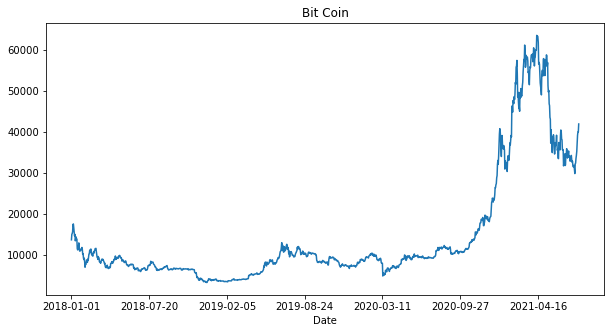

In [21]:
import matplotlib
import matplotlib.pyplot as plt

plt_bt = df["BTC Close"].plot(kind='line', figsize=(10,5), title="Bit Coin")

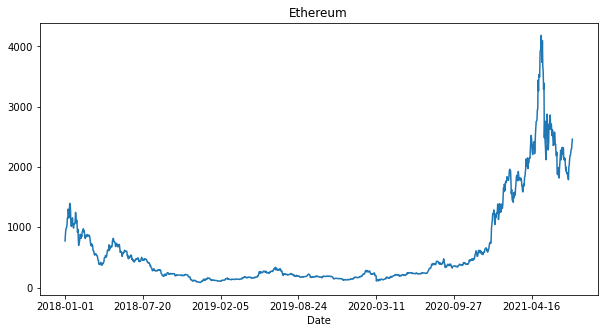

In [22]:
plt_bt = df["ETH Close"].plot(kind='line', figsize=(10,5), title="Ethereum")

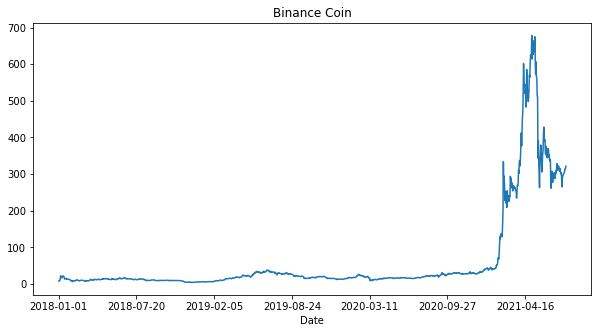

In [23]:
plt_bt = df["BNB Close"].plot(kind='line', figsize=(10,5), title='Binance Coin')

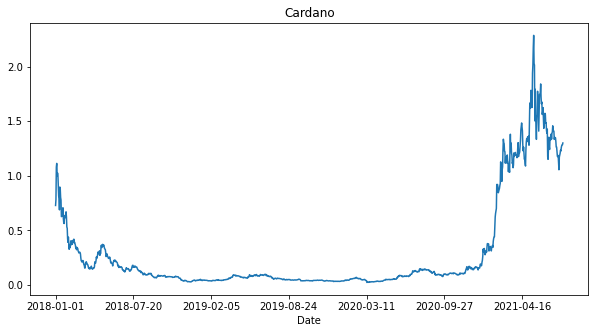

In [24]:
plt_bt = df["ADA Close"].plot(kind='line', figsize=(10,5), title="Cardano")

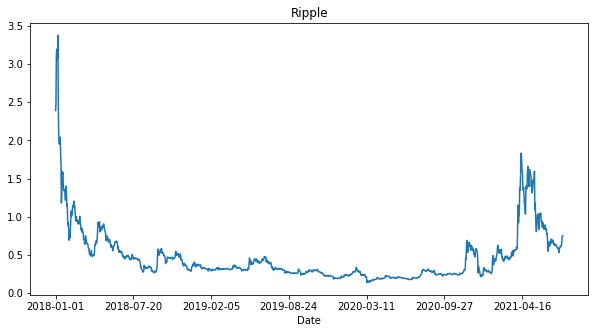

In [25]:
plt_bt = df["XRP Close"].plot(kind='line', figsize=(10,5), title='Ripple')

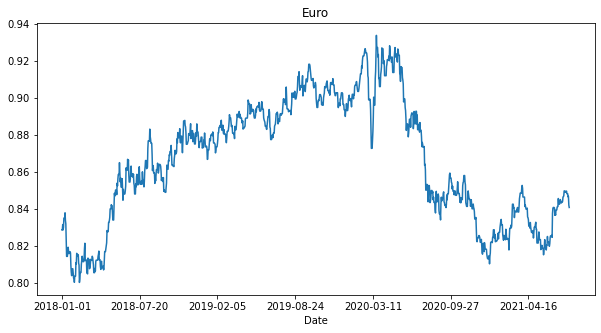

In [26]:
plt_bt = df["Euro Value"].plot(kind='line', figsize=(10,5), title='Euro')

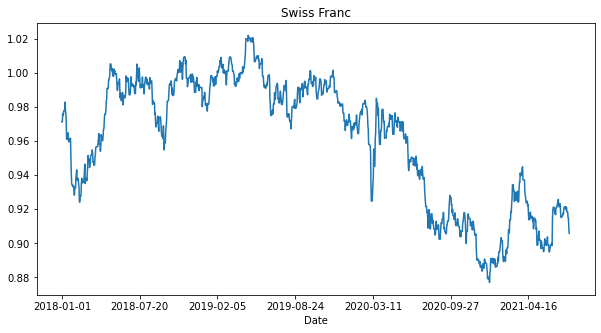

In [27]:
plt_bt = df["Swiss Franc Value"].plot(kind='line', figsize=(10,5), title='Swiss Franc')

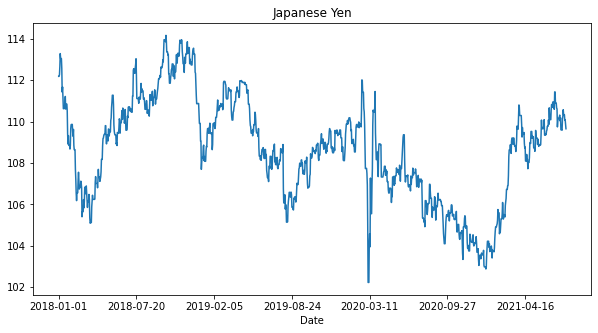

In [28]:
plt_bt = df["Japanese Yen Value"].plot(kind='line', figsize=(10,5), title='Japanese Yen')

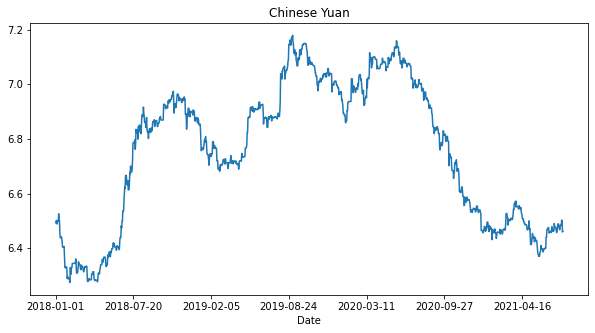

In [29]:
plt_bt = df["Chinese Yuan Value"].plot(kind='line', figsize=(10,5), title='Chinese Yuan')

plt_bt = df["Chinese Yuan Value"].plot(kind='line', figsize=(10,5), title='Chinese Yuan')

<AxesSubplot:title={'center':'Chinese Yuan'}, xlabel='BTC Change', ylabel='Chinese Yuan Value'>

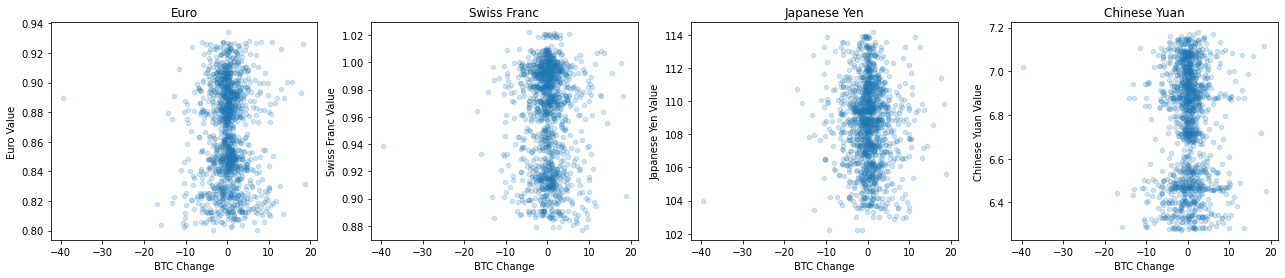

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(22,4))
df.plot.scatter(
x="BTC Change", y="Euro Value", alpha = 0.2, ax=ax[0], title="Euro"
)
df.plot.scatter(
    x="BTC Change", y="Swiss Franc Value", alpha = 0.2, ax=ax[1], title="Swiss Franc"
)
df.plot.scatter(
    x="BTC Change", y="Japanese Yen Value", alpha = 0.2, ax=ax[2], title="Japanese Yen"
)
df.plot.scatter(
    x="BTC Change", y="Chinese Yuan Value", alpha = 0.2, ax=ax[3], title="Chinese Yuan"
)

The majority of changes center around 0% for all the currency, there is no obvious realtions between bit coin and any of the 4 major currency. 

<AxesSubplot:title={'center':'Chinese Yuan'}, xlabel='ETH Change', ylabel='Chinese Yuan Value'>

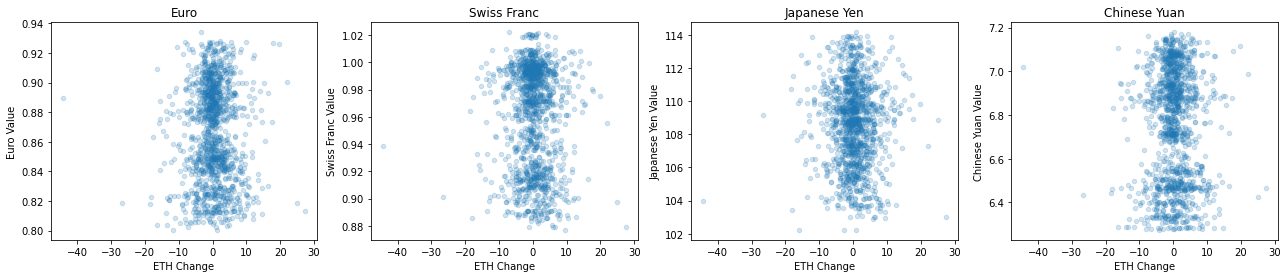

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(22,4))
df.plot.scatter(
    x="ETH Change", y="Euro Value", alpha = 0.2, ax=ax[0], title="Euro"
)
df.plot.scatter(
    x="ETH Change", y="Swiss Franc Value", alpha = 0.2, ax=ax[1], title="Swiss Franc"
)
df.plot.scatter(
    x="ETH Change", y="Japanese Yen Value", alpha = 0.2, ax=ax[2], title="Japanese Yen"
)
df.plot.scatter(
    x="ETH Change", y="Chinese Yuan Value", alpha = 0.2, ax=ax[3], title="Chinese Yuan"
)

The majority of changes center around 0% for all the currency, there is no obvious realtions between ETH and any of the 4 major currency. 

<AxesSubplot:title={'center':'Chinese Yuan'}, xlabel='ADA Change', ylabel='Chinese Yuan Value'>

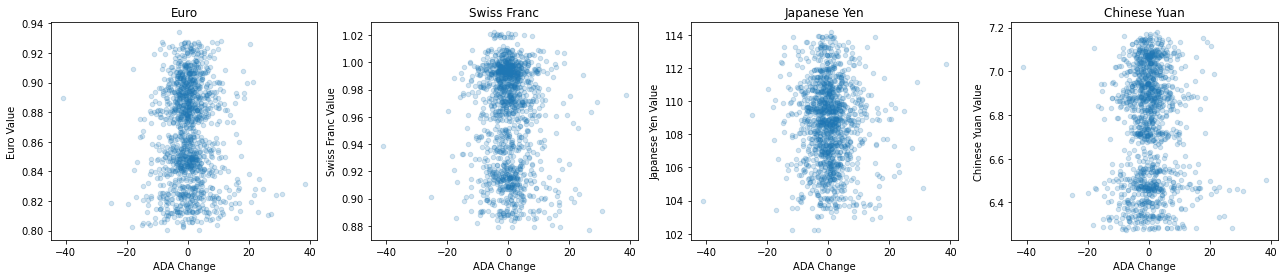

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(22,4))
df.plot.scatter(
    x="ADA Change", y="Euro Value", alpha = 0.2, ax=ax[0], title="Euro"
)
df.plot.scatter(
    x="ADA Change", y="Swiss Franc Value", alpha = 0.2, ax=ax[1], title="Swiss Franc"
)
df.plot.scatter(
    x="ADA Change", y="Japanese Yen Value", alpha = 0.2, ax=ax[2], title="Japanese Yen"
)
df.plot.scatter(
    x="ADA Change", y="Chinese Yuan Value", alpha = 0.2, ax=ax[3], title="Chinese Yuan"
)

The majority of changes center around 0% for all the currency, there is no obvious realtions between bit coin and any of the 4 major currency. 

<AxesSubplot:title={'center':'Chinese Yuan'}, xlabel='XRP Change', ylabel='Chinese Yuan Value'>

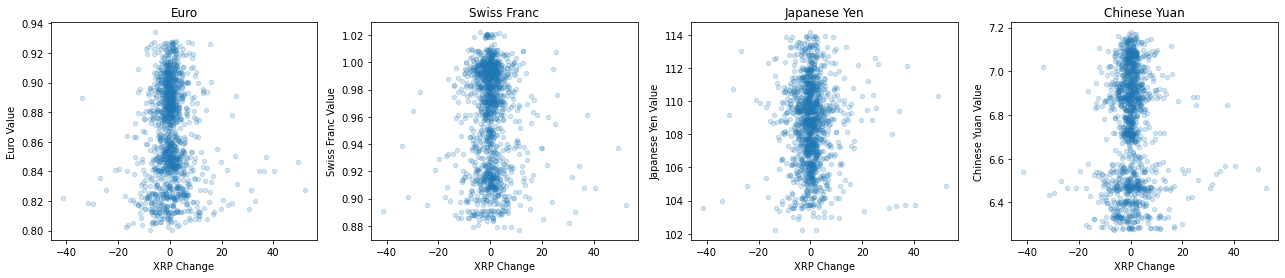

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(22,4))
df.plot.scatter(
    x="XRP Change", y="Euro Value", alpha = 0.2, ax=ax[0], title="Euro"
)
df.plot.scatter(
    x="XRP Change", y="Swiss Franc Value", alpha = 0.2, ax=ax[1], title="Swiss Franc"
)
df.plot.scatter(
    x="XRP Change", y="Japanese Yen Value", alpha = 0.2, ax=ax[2], title="Japanese Yen"
)
df.plot.scatter(
    x="XRP Change", y="Chinese Yuan Value", alpha = 0.2, ax=ax[3], title="Chinese Yuan"
)

In [34]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X_train = df[["BTC Close", "BTC Market_Cap","BTC Change","BNB Close", "BNB Market_Cap","BNB Change","BNB Close", "ADA Market_Cap","ADA Change","XRP Close", "XRP Market_Cap","XRP Change","Euro Value","Swiss Franc Value","Japanese Yen Value", "Chinese Yuan Value"]]
y_train = df["ETH Change"]


In [35]:
linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train) # linear regression model

# Train 10-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=10)
)
knn_model.fit(X=X_train, y=y_train) # knn model

#set new data to test newcur
a="2021"
apilink = "https://api.coinpaprika.com/v1/coins/btc-bitcoin/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp = pd.DataFrame()
df_temp['BTC Close'] = df_crypto1['close']
df_temp['BTC Market_Cap'] = df_crypto1['market_cap']
df_temp['BTC Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
#apilink = "https://api.coinpaprika.com/v1/coins/eth-ethereum/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
#response1 = requests.get(apilink)
#crypto1=json.loads(response1.text)
#df_crypto1=json_normalize(crypto1)
#df_temp['ETH Close'] = df_crypto1['close']
#df_temp['ETH Market_Cap'] = df_crypto1['market_cap']
#df_temp['ETH Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/bnb-binance-coin/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['BNB Close'] = df_crypto1['close']
df_temp['BNB Market_Cap'] = df_crypto1['market_cap']
df_temp['BNB Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/ada-cardano/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['ADA Close'] = df_crypto1['close']
df_temp['ADA Market_Cap'] = df_crypto1['market_cap']
df_temp['ADA Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/xrp-xrp/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['XRP Close'] = df_crypto1['close']
df_temp['XRP Market_Cap'] = df_crypto1['market_cap']
df_temp['XRP Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
new_rates = "rates.2021-08-02."
df_temp['Euro Value']=df_df_temp2021[str(new_rates) + str(currencies[0])]
df_temp['Swiss Franc Value']=df_df_temp2021[str(new_rates) + str(currencies[1])]
df_temp['Japanese Yen Value']=df_df_temp2021[str(new_rates) + str(currencies[2])]
df_temp['Chinese Yuan Value']=df_df_temp2021[str(new_rates) + str(currencies[3])]
newcur=df_temp
linear_model.predict(newcur), knn_model.predict(newcur)

<ipython-input-35-f7a658faa92f>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-35-f7a658faa92f>:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-35-f7a658faa92f>:38: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-35-f7a658faa92f>:45: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


(array([-5.8348786]), array([0.77430095]))

We used both Linear regression and KNN.  Both methods proved to be quite different from one another.

In [36]:
np.mean([
    linear_model.predict(newcur),
    knn_model.predict(newcur)
])

-2.5302888285376923

We then averaged the models together to provide a third prediction

In [37]:
apilink = "https://api.coinpaprika.com/v1/coins/eth-ethereum/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_test = pd.DataFrame()
df_test['ETH Close'] = df_crypto1['close']
df_test['ETH Market_Cap'] = df_crypto1['market_cap']
df_test['ETH Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
df_test

<ipython-input-37-d49a03ad321f>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


,ETH Close,ETH Market_Cap,ETH Change
0,2611.036765,299809105802,1.837642


The actual change was 1.837 percent, which was quite different from all three models.

In [38]:
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)
ensemble_model.predict(newcur)

array([-2.53028883])

In [39]:
for model in [linear_model, knn_model, ensemble_model]: # models 
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())
    
    #  (Ypred - Yact)^2 

12.767871126632336
11.98061452511024
10.852204094248856


All models provided a massive error margin.

In [40]:
X_train = df[["BTC Close", "BTC Market_Cap","BTC Change","BNB Close", "BNB Market_Cap","BNB Change","BNB Close", "ADA Market_Cap","ADA Change","XRP Close", "XRP Market_Cap","XRP Change"]]
y_train = df["ETH Change"]
linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train) # linear regression model

# Train 10-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=10)
)
knn_model.fit(X=X_train, y=y_train) # knn model
a="2021"
apilink = "https://api.coinpaprika.com/v1/coins/btc-bitcoin/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp = pd.DataFrame()
df_temp['BTC Close'] = df_crypto1['close']
df_temp['BTC Market_Cap'] = df_crypto1['market_cap']
df_temp['BTC Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
#apilink = "https://api.coinpaprika.com/v1/coins/eth-ethereum/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
#response1 = requests.get(apilink)
#crypto1=json.loads(response1.text)
#df_crypto1=json_normalize(crypto1)
#df_temp['ETH Close'] = df_crypto1['close']
#df_temp['ETH Market_Cap'] = df_crypto1['market_cap']
#df_temp['ETH Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/bnb-binance-coin/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['BNB Close'] = df_crypto1['close']
df_temp['BNB Market_Cap'] = df_crypto1['market_cap']
df_temp['BNB Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/ada-cardano/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['ADA Close'] = df_crypto1['close']
df_temp['ADA Market_Cap'] = df_crypto1['market_cap']
df_temp['ADA Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/xrp-xrp/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['XRP Close'] = df_crypto1['close']
df_temp['XRP Market_Cap'] = df_crypto1['market_cap']
df_temp['XRP Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
newcur=df_temp
linear_model.predict(newcur), knn_model.predict(newcur)

<ipython-input-40-516d64a59b3f>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-40-516d64a59b3f>:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-40-516d64a59b3f>:38: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-40-516d64a59b3f>:45: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


(array([-5.71868347]), array([0.86493346]))

Next we repeated the above process using only crypto related data for our x train.

In [41]:
np.mean([
    linear_model.predict(newcur),
    knn_model.predict(newcur)
])

-2.4268750048459196

In [42]:
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)
ensemble_model.predict(newcur)

array([-2.426875])

In [43]:
for model in [linear_model, knn_model, ensemble_model]: # models 
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())
    
    #  (Ypred - Yact)^2 

12.968948649040556
11.053114267604695
10.51001551133441


These methods again provided a massive difference from what the actual ETH change percentage was.

In [44]:
X_train = df[["BTC Change","BNB Change","ADA Change","XRP Change","Euro Value","Swiss Franc Value","Japanese Yen Value", "Chinese Yuan Value"]]
y_train = df["ETH Change"]
linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train) # linear regression model

# Train 10-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=10)
)
knn_model.fit(X=X_train, y=y_train) # knn model

#set new data to test newcur
a="2021"
apilink = "https://api.coinpaprika.com/v1/coins/btc-bitcoin/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp = pd.DataFrame()
df_temp['BTC Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/bnb-binance-coin/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['BNB Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/ada-cardano/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['ADA Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
apilink = "https://api.coinpaprika.com/v1/coins/xrp-xrp/ohlcv/historical?start=" + str(a) + "-08-02&end=2021-08-02"
response1 = requests.get(apilink)
crypto1=json.loads(response1.text)
df_crypto1=json_normalize(crypto1)
df_temp['XRP Change']=((df_crypto1['close']/df_crypto1['open'])-1)*100
new_rates = "rates.2021-08-02."
df_temp['Euro Value']=df_df_temp2021[str(new_rates) + str(currencies[0])]
df_temp['Swiss Franc Value']=df_df_temp2021[str(new_rates) + str(currencies[1])]
df_temp['Japanese Yen Value']=df_df_temp2021[str(new_rates) + str(currencies[2])]
df_temp['Chinese Yuan Value']=df_df_temp2021[str(new_rates) + str(currencies[3])]
newcur=df_temp
linear_model.predict(newcur), knn_model.predict(newcur)

<ipython-input-44-014903b017ab>:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-44-014903b017ab>:24: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-44-014903b017ab>:29: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)
<ipython-input-44-014903b017ab>:34: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_crypto1=json_normalize(crypto1)


(array([-0.94046095]), array([1.24514369]))

In [45]:
np.mean([
    linear_model.predict(newcur),
    knn_model.predict(newcur)
])

0.1523413710014515

In [46]:
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)
ensemble_model.predict(newcur)

array([0.15234137])

In [47]:
for model in [linear_model, knn_model, ensemble_model]: # models 
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())
    
    #  (Ypred - Yact)^2 

7.432277440007001
8.660110275243493
7.35664274404302


Lastly we trained our x values using the crypto change and the currency values.  This provided our closest prediction with the KNN method. Overall all three methods provided their closest prediction compared to the previous training methods.  This seems to indicate that perhaps there might be a minor relationship between cryptocurrency values and currency values even if the the relationship is not readily apparent in our visualization. 